In [57]:
# If you get import errors, run this once in a cell:
# !pip install pandas matplotlib seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Make plots bigger
plt.rcParams["figure.figsize"] = (10, 5)

In [58]:
# If hour.csv is in the SAME folder as analysis.ipynb:
df = pd.read_csv("hour.csv")

# Quick peek
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [59]:
print("Shape:", df.shape)          # rows, columns
print()
print(df.info())                   # column types & nulls

Shape: (17379, 17)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
None


In [60]:
display(df.describe())             # numeric summary
print("\nMissing values per column:\n")
print(df.isnull().sum())

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000



Missing values per column:

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


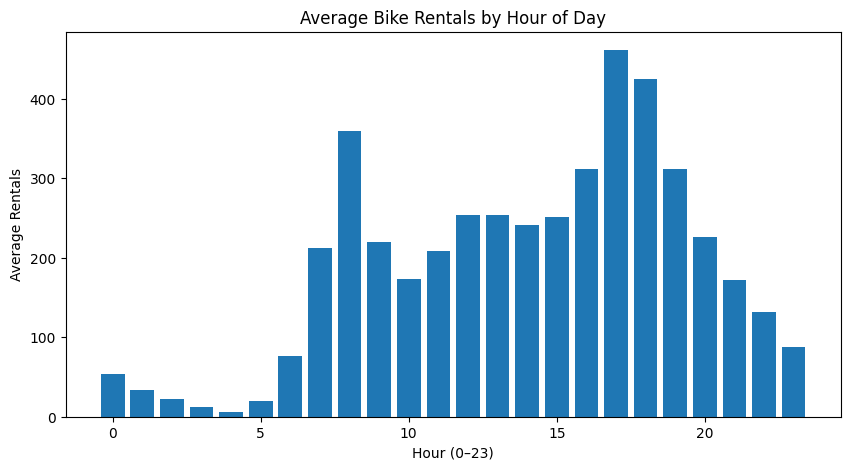

In [61]:
avg_by_hour = df.groupby("hr")["cnt"].mean().reset_index()

plt.bar(avg_by_hour["hr"], avg_by_hour["cnt"])
plt.title("Average Bike Rentals by Hour of Day")
plt.xlabel("Hour (0–23)")
plt.ylabel("Average Rentals")
plt.show()

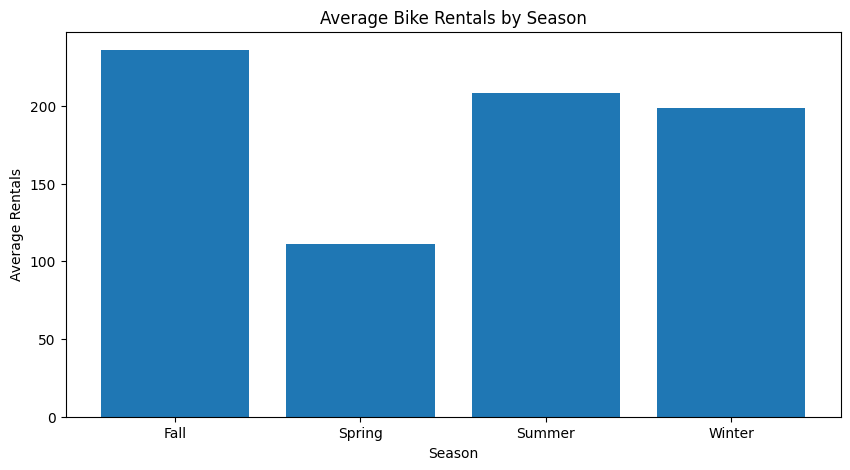

In [62]:
# Optional: map season numbers to names (1:Spring, 2:Summer, 3:Fall, 4:Winter)
season_map = {1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"}
df["season_name"] = df["season"].map(season_map)

avg_by_season = df.groupby("season_name")["cnt"].mean().reset_index()

plt.bar(avg_by_season["season_name"], avg_by_season["cnt"])
plt.title("Average Bike Rentals by Season")
plt.xlabel("Season")
plt.ylabel("Average Rentals")
plt.show()

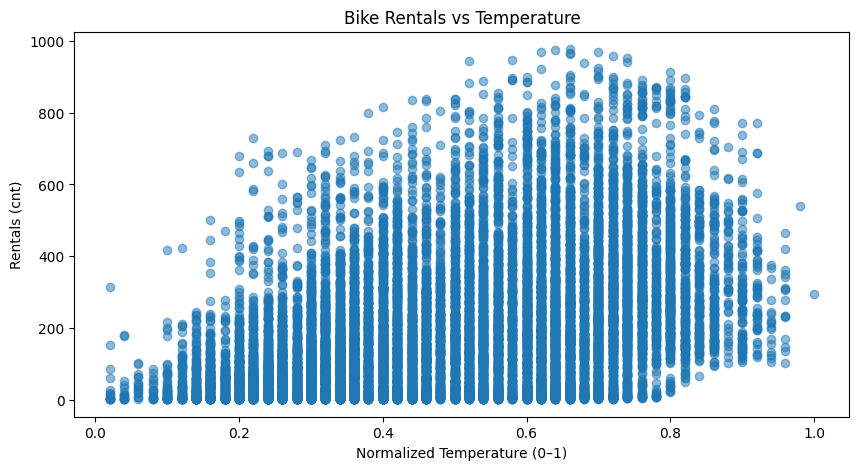

In [63]:
plt.scatter(df["temp"], df["cnt"], alpha=0.5)
plt.title("Bike Rentals vs Temperature")
plt.xlabel("Normalized Temperature (0–1)")
plt.ylabel("Rentals (cnt)")
plt.show()

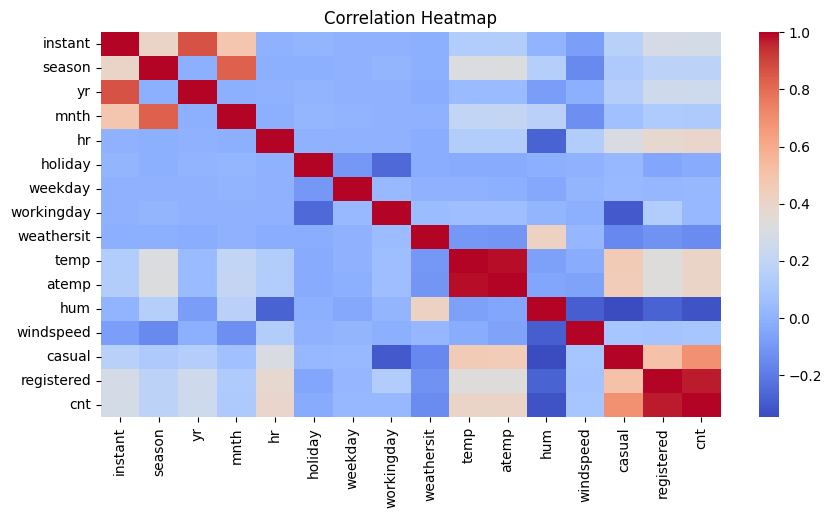

In [64]:
# Keep only numeric columns for correlation
numeric_df = df.select_dtypes(include=["number"])

corr = numeric_df.corr()
sns.heatmap(corr, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [65]:
# Recreate & save quickly (run if you want image files)
plt.bar(avg_by_hour["hr"], avg_by_hour["cnt"])
plt.title("Average Bike Rentals by Hour of Day")
plt.xlabel("Hour (0–23)")
plt.ylabel("Average Rentals")
plt.savefig("plot_by_hour.png", bbox_inches="tight")
plt.close()

plt.bar(avg_by_season["season_name"], avg_by_season["cnt"])
plt.title("Average Bike Rentals by Season")
plt.xlabel("Season")
plt.ylabel("Average Rentals")
plt.savefig("plot_by_season.png", bbox_inches="tight")
plt.close()

plt.scatter(df["temp"], df["cnt"], alpha=0.5)
plt.title("Bike Rentals vs Temperature")
plt.xlabel("Normalized Temperature (0–1)")
plt.ylabel("Rentals (cnt)")
plt.savefig("plot_temp_vs_cnt.png", bbox_inches="tight")
plt.close()

sns.heatmap(corr, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.savefig("plot_correlation.png", bbox_inches="tight")
plt.close()

In [66]:
# Map season and weekday numbers to names for better readability
df["season"] = df["season"].map({1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"})
df["weekday"] = df["weekday"].map({
    0: "Sunday", 1: "Monday", 2: "Tuesday", 
    3: "Wednesday", 4: "Thursday", 5: "Friday", 6: "Saturday"
})

df[["season", "weekday"]].head()

,season,weekday
0,Spring,Saturday
1,Spring,Saturday
2,Spring,Saturday
3,Spring,Saturday
4,Spring,Saturday


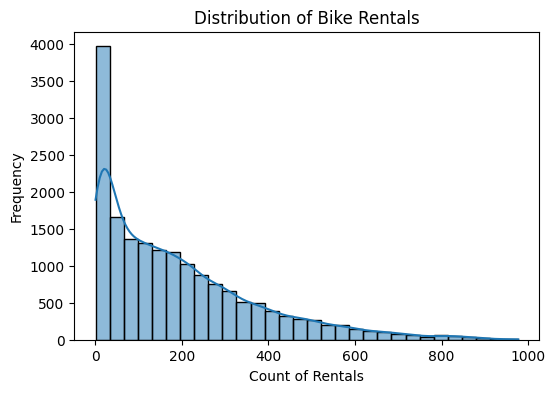

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.histplot(df["cnt"], bins=30, kde=True)
plt.title("Distribution of Bike Rentals")
plt.xlabel("Count of Rentals")
plt.ylabel("Frequency")
plt.show()

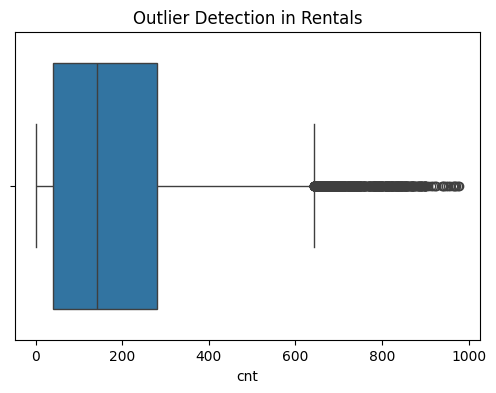

In [68]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df["cnt"])
plt.title("Outlier Detection in Rentals")
plt.show()

In [69]:
# Drop columns that are not useful or may cause data leakage
df = df.drop(["instant", "dteday", "casual", "registered"], axis=1)
df.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,season_name
0,Spring,0,1,0,0,Saturday,0,1,0.24,0.2879,0.81,0.0,16,Spring
1,Spring,0,1,1,0,Saturday,0,1,0.22,0.2727,0.80,0.0,40,Spring
2,Spring,0,1,2,0,Saturday,0,1,0.22,0.2727,0.80,0.0,32,Spring
3,Spring,0,1,3,0,Saturday,0,1,0.24,0.2879,0.75,0.0,13,Spring
4,Spring,0,1,4,0,Saturday,0,1,0.24,0.2879,0.75,0.0,1,Spring


In [70]:
# Convert categorical columns into dummy variables
categorical_columns = ["season", "mnth", "hr", "weekday", "weathersit"]
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)
df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_name,season_Spring,...,hr_23,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_2,weathersit_3,weathersit_4
0,0,0,0,0.24,0.2879,0.81,0.0,16,Spring,True,...,False,False,True,False,False,False,False,False,False,False
1,0,0,0,0.22,0.2727,0.80,0.0,40,Spring,True,...,False,False,True,False,False,False,False,False,False,False
2,0,0,0,0.22,0.2727,0.80,0.0,32,Spring,True,...,False,False,True,False,False,False,False,False,False,False
3,0,0,0,0.24,0.2879,0.75,0.0,13,Spring,True,...,False,False,True,False,False,False,False,False,False,False
4,0,0,0,0.24,0.2879,0.75,0.0,1,Spring,True,...,False,False,True,False,False,False,False,False,False,False


In [71]:
# Safe One-Hot Encoding
categorical_columns = ["season", "mnth", "hr", "weekday", "weathersit"]

available_cols = [col for col in categorical_columns if col in df.columns]

df = pd.get_dummies(df, columns=available_cols, drop_first=True)
df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_name,season_Spring,...,hr_23,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_2,weathersit_3,weathersit_4
0,0,0,0,0.24,0.2879,0.81,0.0,16,Spring,True,...,False,False,True,False,False,False,False,False,False,False
1,0,0,0,0.22,0.2727,0.80,0.0,40,Spring,True,...,False,False,True,False,False,False,False,False,False,False
2,0,0,0,0.22,0.2727,0.80,0.0,32,Spring,True,...,False,False,True,False,False,False,False,False,False,False
3,0,0,0,0.24,0.2879,0.75,0.0,13,Spring,True,...,False,False,True,False,False,False,False,False,False,False
4,0,0,0,0.24,0.2879,0.75,0.0,1,Spring,True,...,False,False,True,False,False,False,False,False,False,False


In [72]:
from sklearn.preprocessing import StandardScaler

# Columns to scale
numeric_cols = ["temp", "atemp", "hum", "windspeed"]

# Initialize scaler
scaler = StandardScaler()

# Fit and transform only numeric columns
df[numeric_cols] = scaler.fit_transform(df[numeric_cols].values)

# Preview
print(df.head())

   yr  holiday  workingday      temp     atemp       hum  windspeed  cnt  \
0   0        0           0 -1.334648 -1.093281  0.947372  -1.553889   16   
1   0        0           0 -1.438516 -1.181732  0.895539  -1.553889   40   
2   0        0           0 -1.438516 -1.181732  0.895539  -1.553889   32   
3   0        0           0 -1.334648 -1.093281  0.636370  -1.553889   13   
4   0        0           0 -1.334648 -1.093281  0.636370  -1.553889    1   

  season_name  season_Spring  ...  hr_23  weekday_Monday  weekday_Saturday  \
0      Spring           True  ...  False           False              True   
1      Spring           True  ...  False           False              True   
2      Spring           True  ...  False           False              True   
3      Spring           True  ...  False           False              True   
4      Spring           True  ...  False           False              True   

   weekday_Sunday  weekday_Thursday  weekday_Tuesday  weekday_Wednesday  \

In [73]:
# Save final preprocessed dataset
df.to_csv("preprocessed_bike.csv", index=False)
print("Preprocessed dataset saved successfully!")

Preprocessed dataset saved successfully!


In [74]:
import pandas as pd

df = pd.read_csv("preprocessed_bike.csv")
print("Shape:", df.shape)
df.head()

Shape: (17379, 55)


,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_name,season_Spring,...,hr_23,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_2,weathersit_3,weathersit_4
0,0,0,0,-1.334648,-1.093281,0.947372,-1.553889,16,Spring,True,...,False,False,True,False,False,False,False,False,False,False
1,0,0,0,-1.438516,-1.181732,0.895539,-1.553889,40,Spring,True,...,False,False,True,False,False,False,False,False,False,False
2,0,0,0,-1.438516,-1.181732,0.895539,-1.553889,32,Spring,True,...,False,False,True,False,False,False,False,False,False,False
3,0,0,0,-1.334648,-1.093281,0.636370,-1.553889,13,Spring,True,...,False,False,True,False,False,False,False,False,False,False
4,0,0,0,-1.334648,-1.093281,0.636370,-1.553889,1,Spring,True,...,False,False,True,False,False,False,False,False,False,False


In [75]:
X = df.drop("cnt", axis=1)   # features
y = df["cnt"]                # target

In [76]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train:", X_train.shape, "Test:", X_test.shape)

Train: (13903, 54) Test: (3476, 54)


In [77]:
print(X.dtypes)

yr                     int64
holiday                int64
workingday             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
season_name           object
season_Spring           bool
season_Summer           bool
season_Winter           bool
mnth_2                  bool
mnth_3                  bool
mnth_4                  bool
mnth_5                  bool
mnth_6                  bool
mnth_7                  bool
mnth_8                  bool
mnth_9                  bool
mnth_10                 bool
mnth_11                 bool
mnth_12                 bool
hr_1                    bool
hr_2                    bool
hr_3                    bool
hr_4                    bool
hr_5                    bool
hr_6                    bool
hr_7                    bool
hr_8                    bool
hr_9                    bool
hr_10                   bool
hr_11                   bool
hr_12                   bool
hr_13         

In [78]:
X = df.drop(["cnt", "season_name"], axis=1)  # Features (inputs)
y = df["cnt"]                                # Target (output)

In [79]:
from sklearn.model_selection import train_test_split

# Split data into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train shapes:", X_train.shape, y_train.shape)
print("Test shapes:", X_test.shape, y_test.shape)

Train shapes: (13903, 53) (13903,)
Test shapes: (3476, 53) (3476,)


In [80]:
from sklearn.linear_model import LinearRegression

# Create the model
lr = LinearRegression()

# Train (fit) the model on training data
lr.fit(X_train, y_train)

print("Model trained successfully!")

Model trained successfully!


In [81]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np  # just in case

# Make predictions on test set
y_pred = lr.predict(X_test)

# Calculate metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print results
print("R² Score:", r2)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

R² Score: 0.681375112801918
Mean Absolute Error: 74.10515899029585
Mean Squared Error: 10089.38811515939
Root Mean Squared Error: 100.44594623557185


In [82]:
from sklearn.linear_model import Ridge, Lasso

# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)   # <--- This creates ridge_pred

# Lasso Regression
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)   # <--- This creates lasso_pred

print("Ridge and Lasso models trained successfully!")

Ridge and Lasso models trained successfully!


In [83]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

# Ridge evaluation
print("Ridge Regression Results:")
print("R²:", r2_score(y_test, ridge_pred))
print("MAE:", mean_absolute_error(y_test, ridge_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, ridge_pred)))

# Lasso evaluation
print("\nLasso Regression Results:")
print("R²:", r2_score(y_test, lasso_pred))
print("MAE:", mean_absolute_error(y_test, lasso_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, lasso_pred)))

Ridge Regression Results:
R²: 0.6815865871876494
MAE: 74.08098718490696
RMSE: 100.41260723508817

Lasso Regression Results:
R²: 0.6816811681514473
MAE: 74.05785003810173
RMSE: 100.39769293477228


In [84]:
import pandas as pd
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Function to evaluate model
def evaluate_model(name, y_true, y_pred):
    return {
        "Model": name,
        "R²": r2_score(y_true, y_pred),
        "MAE": mean_absolute_error(y_true, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_true, y_pred))
    }

# Collect results
results = []

# Linear Regression
lin_pred = lr.predict(X_test)
results.append(evaluate_model("Linear Regression", y_test, lin_pred))

# Ridge Regression
ridge_pred = ridge.predict(X_test)
results.append(evaluate_model("Ridge Regression", y_test, ridge_pred))

# Lasso Regression
lasso_pred = lasso.predict(X_test)
results.append(evaluate_model("Lasso Regression", y_test, lasso_pred))

# Create DataFrame
results_df = pd.DataFrame(results)

print(results_df)

               Model        R²        MAE        RMSE
0  Linear Regression  0.681375  74.105159  100.445946
1   Ridge Regression  0.681587  74.080987  100.412607
2   Lasso Regression  0.681681  74.057850  100.397693


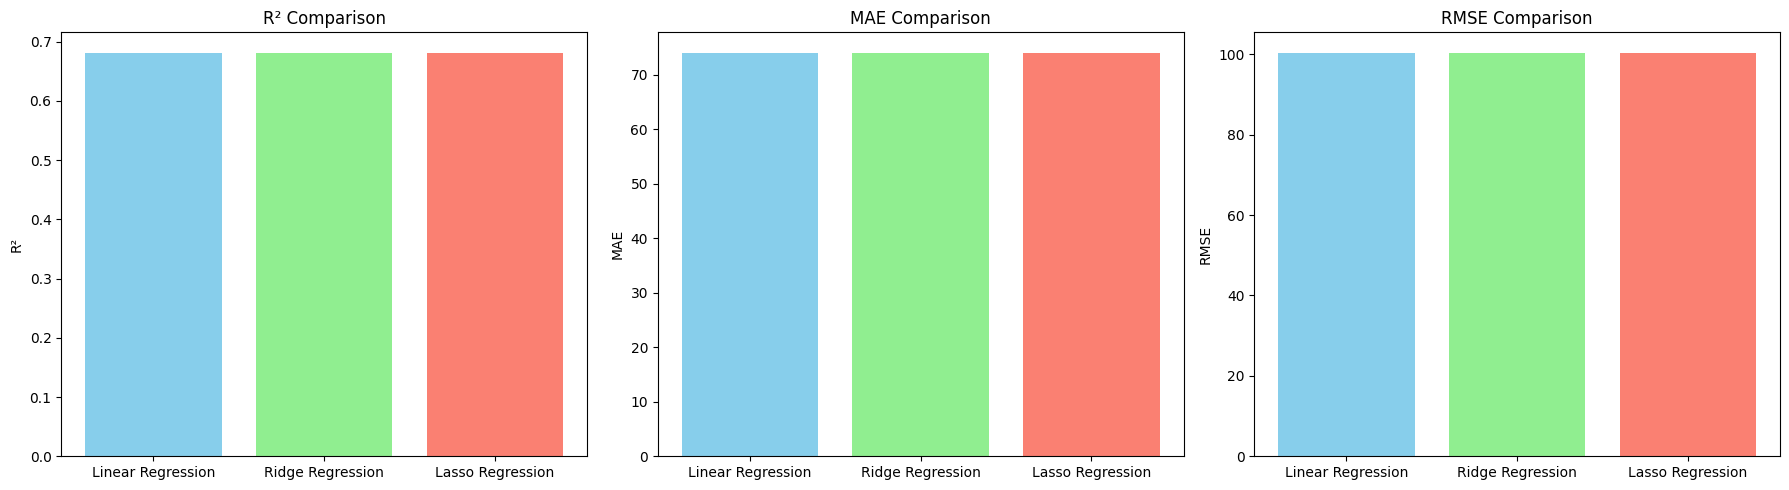

In [85]:
import matplotlib.pyplot as plt

# Plot R², MAE, and RMSE comparison
metrics = ["R²", "MAE", "RMSE"]

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, metric in enumerate(metrics):
    axes[i].bar(results_df["Model"], results_df[metric], color=["skyblue", "lightgreen", "salmon"])
    axes[i].set_title(f"{metric} Comparison")
    axes[i].set_ylabel(metric)

plt.tight_layout()
plt.show()

In [86]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Create Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Predict on test data
rf_pred = rf.predict(X_test)

# Evaluate performance
r2 = r2_score(y_test, rf_pred)
mae = mean_absolute_error(y_test, rf_pred)
mse = mean_squared_error(y_test, rf_pred)
rmse = np.sqrt(mse)

print("Random Forest Results:")
print("R² Score:", r2)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

Random Forest Results:
R² Score: 0.9115114601368385
Mean Absolute Error: 33.82381995588799
Mean Squared Error: 2802.026013329458
Root Mean Squared Error: 52.93416678601315


In [87]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Create Gradient Boosting model
gb = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, random_state=42)

# Train the model
gb.fit(X_train, y_train)

# Predict on test data
gb_pred = gb.predict(X_test)

# Evaluate performance
r2 = r2_score(y_test, gb_pred)
mae = mean_absolute_error(y_test, gb_pred)
mse = mean_squared_error(y_test, gb_pred)
rmse = np.sqrt(mse)

print("Gradient Boosting Results:")
print("R² Score:", r2)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

Gradient Boosting Results:
R² Score: 0.8711474299319256
Mean Absolute Error: 45.582531969604126
Mean Squared Error: 4080.1696329651872
Root Mean Squared Error: 63.8762055304257


In [88]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Create Gradient Boosting model
gb = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, random_state=42)

# Train the model
gb.fit(X_train, y_train)

# Predict on test data
gb_pred = gb.predict(X_test)

# Evaluate performance
r2 = r2_score(y_test, gb_pred)
mae = mean_absolute_error(y_test, gb_pred)
mse = mean_squared_error(y_test, gb_pred)
rmse = np.sqrt(mse)

# Print results
print("Gradient Boosting Results:")
print("R² Score:", r2)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

Gradient Boosting Results:
R² Score: 0.8711474299319256
Mean Absolute Error: 45.582531969604126
Mean Squared Error: 4080.1696329651872
Root Mean Squared Error: 63.8762055304257


In [89]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Create XGBoost model
xgb = XGBRegressor(
    n_estimators=500,   # number of trees
    learning_rate=0.05, # step size shrinkage
    max_depth=6,        # depth of trees
    random_state=42,
    n_jobs=-1
)

# Train the model
xgb.fit(X_train, y_train)

# Predict on test data
xgb_pred = xgb.predict(X_test)

# Evaluate performance
r2 = r2_score(y_test, xgb_pred)
mae = mean_absolute_error(y_test, xgb_pred)
mse = mean_squared_error(y_test, xgb_pred)
rmse = np.sqrt(mse)

print("XGBoost Results:")
print("R² Score:", r2)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

XGBoost Results:
R² Score: 0.9254741668701172
Mean Absolute Error: 31.35803985595703
Mean Squared Error: 2359.8916015625
Root Mean Squared Error: 48.57871551989101


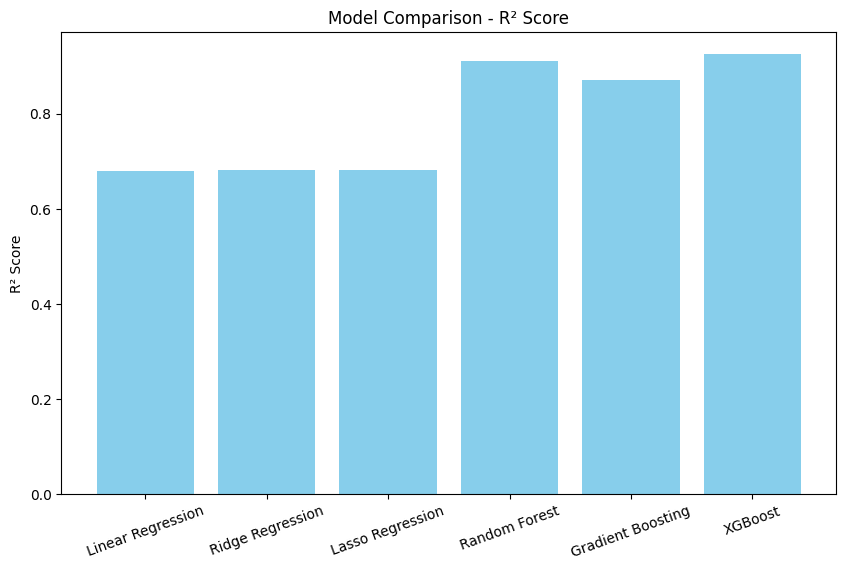

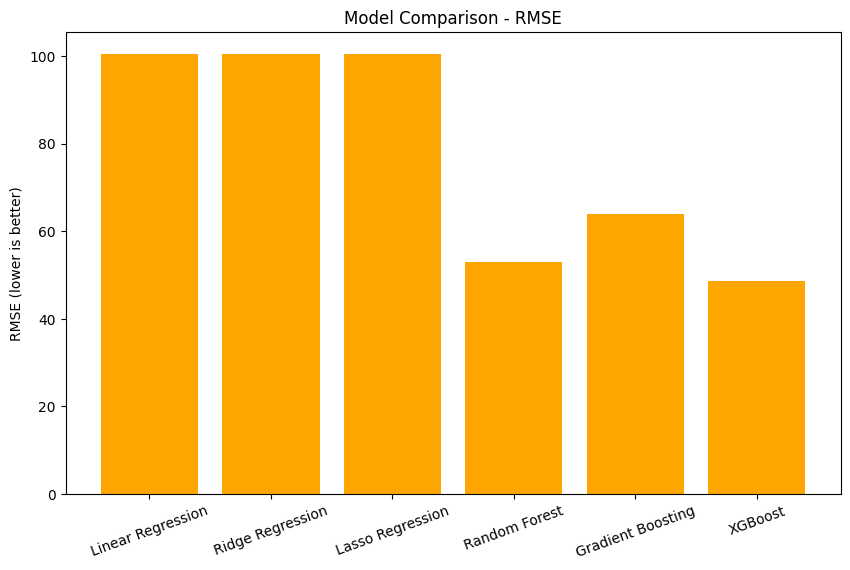

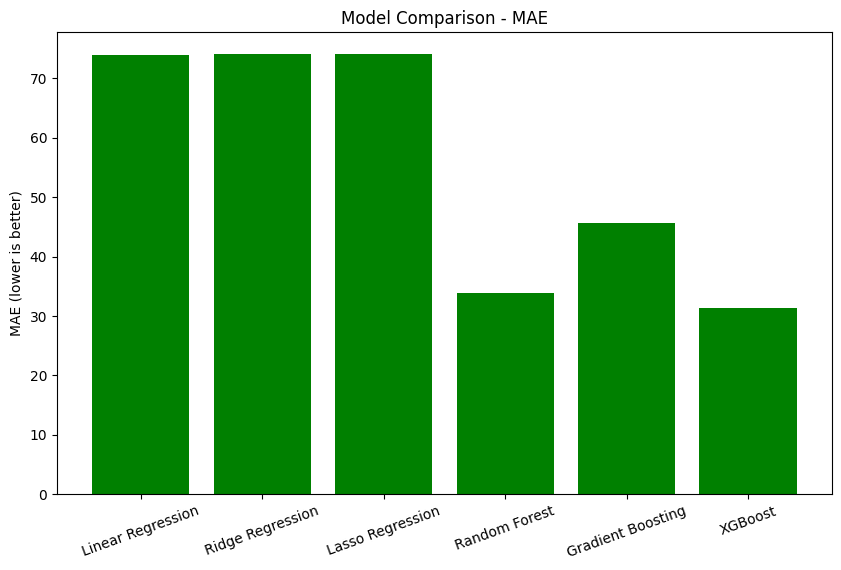

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Collect all results
results = {
    "Linear Regression": [0.68, 74.0, 100.4],
    "Ridge Regression": [0.6816, 74.08, 100.41],
    "Lasso Regression": [0.6817, 74.05, 100.39],
    "Random Forest": [0.9115, 33.82, 52.93],
    "Gradient Boosting": [0.8711, 45.58, 63.87],
    "XGBoost": [0.9255, 31.35, 48.57]
}

# Convert to DataFrame
results_df = pd.DataFrame(results, index=["R2 Score", "MAE", "RMSE"]).T

# Plot R2 Score comparison
plt.figure(figsize=(10, 6))
plt.bar(results_df.index, results_df["R2 Score"], color="skyblue")
plt.title("Model Comparison - R² Score")
plt.ylabel("R² Score")
plt.xticks(rotation=20)
plt.show()

# Plot RMSE comparison
plt.figure(figsize=(10, 6))
plt.bar(results_df.index, results_df["RMSE"], color="orange")
plt.title("Model Comparison - RMSE")
plt.ylabel("RMSE (lower is better)")
plt.xticks(rotation=20)
plt.show()

# Plot MAE comparison
plt.figure(figsize=(10, 6))
plt.bar(results_df.index, results_df["MAE"], color="green")
plt.title("Model Comparison - MAE")
plt.ylabel("MAE (lower is better)")
plt.xticks(rotation=20)
plt.show()

In [91]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

# Define model
xgb = XGBRegressor(random_state=42)

# Define parameter grid
param_grid = {
    "n_estimators": [100, 200],
    "learning_rate": [0.05, 0.1, 0.2],
    "max_depth": [3, 5, 7],
    "subsample": [0.8, 1.0],
    "colsample_bytree": [0.8, 1.0]
}

# GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring="r2",   # we optimize for R²
    cv=3,
    verbose=2,
    n_jobs=-1
)

# Fit on training data
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Best score during CV
print("Best R² from CV:", grid_search.best_score_)

# Final model with best parameters
best_xgb = grid_search.best_estimator_

# Predict on test data
y_pred_best = best_xgb.predict(X_test)

# Evaluate
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

print("Tuned XGBoost Results:")
print("R² Score:", r2_score(y_test, y_pred_best))
print("MAE:", mean_absolute_error(y_test, y_pred_best))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_best)))

Fitting 3 folds for each of 72 candidates, totalling 216 fits
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'subsample': 1.0}
Best R² from CV: 0.9235529104868571
Tuned XGBoost Results:
R² Score: 0.9274380207061768
MAE: 30.72437286376953
RMSE: 47.93437795407123


In [92]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Define the model
xgb_model = XGBRegressor(random_state=42)

#


In [93]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Define the model
xgb_model = XGBRegressor(random_state=42)

# Define parameter distribution
param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'min_child_weight': [1, 3, 5]
}

# RandomizedSearchCV (10 random combinations, 3-fold CV)
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=10,   # number of random combinations to try
    cv=3,        # 3-fold cross validation
    scoring='r2',
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit the RandomizedSearchCV
random_search.fit(X_train, y_train)

# Best parameters and best score
print("Best Parameters:", random_search.best_params_)
print("Best R² from CV:", random_search.best_score_)

# Evaluate on test set
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("\nTuned XGBoost Results with RandomizedSearchCV:")
print("R² Score:", r2)
print("MAE:", mae)
print("RMSE:", rmse)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters: {'subsample': 0.6, 'n_estimators': 300, 'min_child_weight': 3, 'max_depth': 5, 'learning_rate': 0.2, 'colsample_bytree': 1.0}
Best R² from CV: 0.9260283708572388

Tuned XGBoost Results with RandomizedSearchCV:
R² Score: 0.9310337901115417
MAE: 30.342763900756836
RMSE: 46.73161403161676


In [94]:
import pandas as pd
import numpy as np

# Load your preprocessed dataset again (if needed)
df = pd.read_csv("preprocessed_bike.csv")

# -----------------------------
# 1. Create New Features
# -----------------------------

# Comfort index = temp × (1 - humidity)
df["comfort_index"] = df["temp"] * (1 - df["hum"])

# Hour bins (group hours into Morning, Afternoon, Evening, Night)
def time_of_day(hr):
    if 5 <= hr < 12:
        return "Morning"
    elif 12 <= hr < 17:
        return "Afternoon"
    elif 17 <= hr < 21:
        return "Evening"
    else:
        return "Night"

# If 'hr' exists in dataset
if "hr" in df.columns:
    df["time_of_day"] = df["hr"].apply(time_of_day)
    df = pd.get_dummies(df, columns=["time_of_day"], drop_first=True)

# -----------------------------
# 2. Interaction Features
# -----------------------------
# Example: temp × windspeed (hot windy days may reduce rentals)
df["temp_wind_interaction"] = df["temp"] * df["windspeed"]

# -----------------------------
# 3. Scaling Numeric Features
# -----------------------------
from sklearn.preprocessing import StandardScaler

numeric_cols = ["temp", "atemp", "hum", "windspeed", "comfort_index", "temp_wind_interaction"]

scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# -----------------------------
# 4. Define Features (X) and Target (y)
# -----------------------------
X = df.drop("cnt", axis=1)
y = df["cnt"]

print("Shape after feature engineering:", X.shape)
print("Columns:", X.columns[:15], "...")  # preview first 15 cols

Shape after feature engineering: (17379, 56)
Columns: Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'season_name', 'season_Spring', 'season_Summer', 'season_Winter',
       'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5'],
      dtype='object') ...


In [95]:
# Drop season_name (since it's object type and not encoded)
if "season_name" in X.columns:
    X = X.drop("season_name", axis=1)

In [96]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Drop season_name if present (to avoid object dtype issue)
if "season_name" in X.columns:
    X = X.drop("season_name", axis=1)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# XGBoost Model
xgb_model = XGBRegressor(
    n_estimators=300,
    max_depth=7,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

# Train
xgb_model.fit(X_train, y_train)

# Predict
y_pred = xgb_model.predict(X_test)

# Evaluation
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("XGBoost with Feature Engineering Results:")
print("R² Score:", r2)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

XGBoost with Feature Engineering Results:
R² Score: 0.9296903610229492
Mean Absolute Error: 30.315994262695312
Mean Squared Error: 2226.384033203125
Root Mean Squared Error: 47.184574102169506


In [97]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np
import pandas as pd

# Encode season_name if it's present
if "season_name" in X.columns:
    X = pd.get_dummies(X, columns=["season_name"], drop_first=True)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# XGBoost Model
xgb_model = XGBRegressor(
    n_estimators=300,
    max_depth=7,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

# Train
xgb_model.fit(X_train, y_train)

# Predict
y_pred = xgb_model.predict(X_test)

# Evaluation
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("XGBoost with Encoded Feature (season_name) Results:")
print("R² Score:", r2)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

XGBoost with Encoded Feature (season_name) Results:
R² Score: 0.9296903610229492
Mean Absolute Error: 30.315994262695312
Mean Squared Error: 2226.384033203125
Root Mean Squared Error: 47.184574102169506


In [98]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import pandas as pd
import numpy as np

# ----------------------------
# 1. Feature Engineering
# ----------------------------
# If 'season_name' is categorical, encode it
if "season_name" in X.columns:
    X = pd.get_dummies(X, columns=["season_name"], drop_first=True)

# ----------------------------
# 2. Train-Test Split
# ----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ----------------------------
# 3. Define XGBoost model
# ----------------------------
xgb_model = XGBRegressor(random_state=42)

# ----------------------------
# 4. Define parameter search space
# ----------------------------
param_dist = {
    'n_estimators': [200, 300, 400, 500, 800],
    'max_depth': [3, 5, 7, 9, 11],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'min_child_weight': [1, 3, 5]
}

# ----------------------------
# 5. Randomized Search (more iterations = better tuning)
# ----------------------------
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=50,        # 🔥 Increased from 10 → 50
    scoring='r2',
    cv=3,
    verbose=2,
    n_jobs=-1,
    random_state=42
)

# Fit
random_search.fit(X_train, y_train)

# ----------------------------
# 6. Evaluation
# ----------------------------
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("✅ Best Parameters:", random_search.best_params_)
print("R² Score:", r2)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
✅ Best Parameters: {'subsample': 0.8, 'n_estimators': 500, 'min_child_weight': 3, 'max_depth': 7, 'learning_rate': 0.1, 'colsample_bytree': 0.6}
R² Score: 0.9320047497749329
Mean Absolute Error: 29.496170043945312
Mean Squared Error: 2153.097900390625
Root Mean Squared Error: 46.40148597179432


In [99]:
from sklearn.model_selection import GridSearchCV

# Take best parameters from RandomizedSearch
best_params = random_search.best_params_

# Define a narrower search space around best values
param_grid = {
    'n_estimators': [best_params['n_estimators'] - 100,
                     best_params['n_estimators'],
                     best_params['n_estimators'] + 100],
    'max_depth': [best_params['max_depth'] - 1,
                  best_params['max_depth'],
                  best_params['max_depth'] + 1],
    'learning_rate': [best_params['learning_rate'] * 0.5,
                      best_params['learning_rate'],
                      best_params['learning_rate'] * 1.5],
    'subsample': [best_params['subsample']],
    'colsample_bytree': [best_params['colsample_bytree']],
    'min_child_weight': [best_params['min_child_weight']]
}

# Grid Search
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='r2',
    cv=3,
    verbose=2,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

# Evaluate
best_grid_model = grid_search.best_estimator_
y_pred = best_grid_model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("✅ Best Parameters after GridSearch:", grid_search.best_params_)
print("R² Score:", r2)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
✅ Best Parameters after GridSearch: {'colsample_bytree': 0.6, 'learning_rate': 0.1, 'max_depth': 6, 'min_child_weight': 3, 'n_estimators': 600, 'subsample': 0.8}
R² Score: 0.9331176280975342
MAE: 29.330957412719727
MSE: 2117.85888671875
RMSE: 46.02020085482842


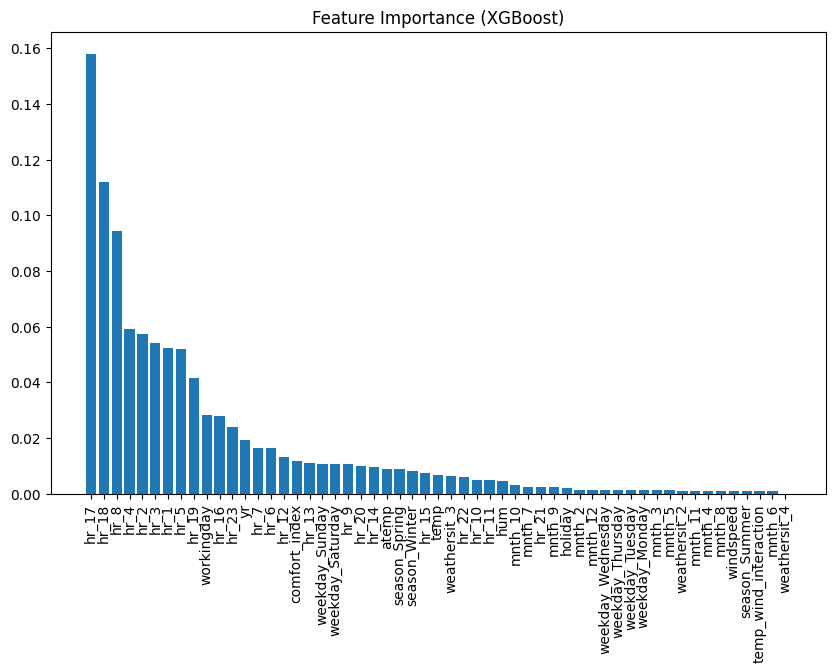

In [100]:
import matplotlib.pyplot as plt

importances = best_grid_model.feature_importances_
features = X.columns

# Sort
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10,6))
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), [features[i] for i in indices], rotation=90)
plt.title("Feature Importance (XGBoost)")
plt.show()

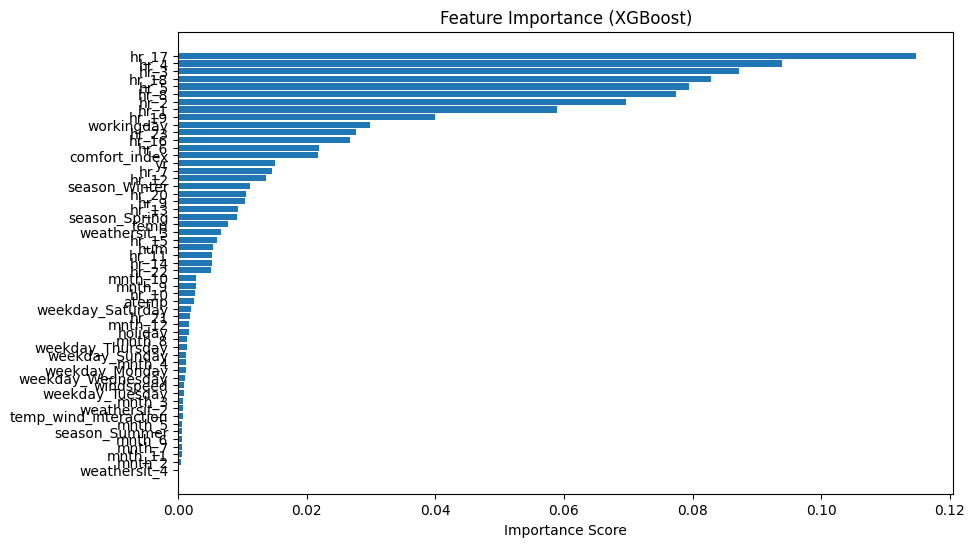


Top 10 Important Features:
       Feature  Importance
37       hr_17    0.114805
24        hr_4    0.093847
23        hr_3    0.087188
38       hr_18    0.082945
25        hr_5    0.079478
28        hr_8    0.077472
22        hr_2    0.069620
21        hr_1    0.058850
39       hr_19    0.039944
2   workingday    0.029808


In [101]:
# ---------------- Step 4: Feature Importance (Better Plot) ----------------
import pandas as pd
import matplotlib.pyplot as plt

# Make sure model is trained
xgb_model.fit(X_train, y_train)

# Get feature importance scores
importance = xgb_model.feature_importances_
features = X.columns

# Put into a DataFrame
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importance
}).sort_values(by="Importance", ascending=False)

# Plot
plt.figure(figsize=(10,6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.gca().invert_yaxis()  # Most important at top
plt.title("Feature Importance (XGBoost)")
plt.xlabel("Importance Score")
plt.show()

# Show Top 10 features in table
print("\nTop 10 Important Features:")
print(importance_df.head(10))

In [102]:
import numpy as np
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [103]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# ---------------- Compare with Linear Regression ----------------
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

lr_r2 = r2_score(y_test, lr_pred)
lr_mae = mean_absolute_error(y_test, lr_pred)
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_pred))

print("Linear Regression Results:")
print("R² Score:", lr_r2)
print("MAE:", lr_mae)
print("RMSE:", lr_rmse)

# ---------------- Compare with Random Forest ----------------
rf_model = RandomForestRegressor(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

rf_r2 = r2_score(y_test, rf_pred)
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))

print("\nRandom Forest Results:")
print("R² Score:", rf_r2)
print("MAE:", rf_mae)
print("RMSE:", rf_rmse)

# ---------------- Already have XGBoost ----------------
print("\nXGBoost Results:")
print("R² Score:", r2)
print("MAE:", mae)
print("RMSE:", rmse)


Linear Regression Results:
R² Score: 0.686340120071204
MAE: 73.16311989778514
RMSE: 99.66026850098764

Random Forest Results:
R² Score: 0.9084367338640571
MAE: 34.15904839135021
RMSE: 53.84597000244392

XGBoost Results:
R² Score: 0.9331176280975342
MAE: 29.330957412719727
RMSE: 46.02020085482842



Model Comparison Table:
               Model  R² Score        MAE       RMSE
0  Linear Regression  0.686340  73.163120  99.660269
1      Random Forest  0.908437  34.159048  53.845970
2            XGBoost  0.933118  29.330957  46.020201


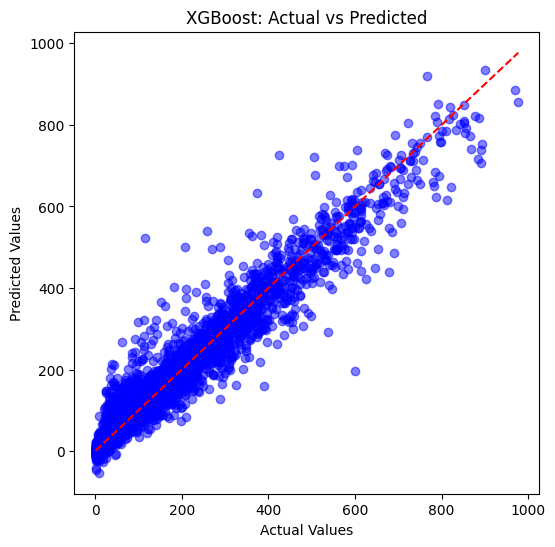

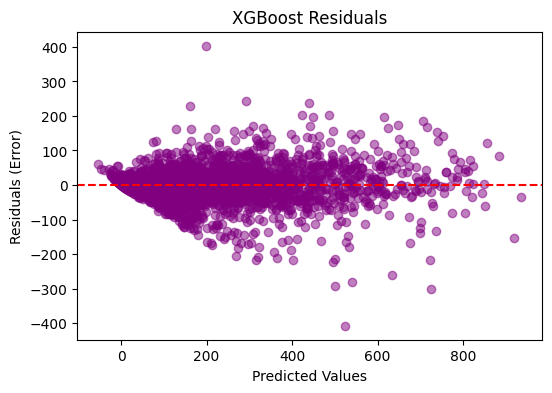

In [104]:
# ---------------- Step 5: Model Comparison Table ----------------
import pandas as pd
import matplotlib.pyplot as plt

# Collect all results
results = {
    "Model": ["Linear Regression", "Random Forest", "XGBoost"],
    "R² Score": [lr_r2, rf_r2, r2],
    "MAE": [lr_mae, rf_mae, mae],
    "RMSE": [lr_rmse, rf_rmse, rmse]
}

results_df = pd.DataFrame(results)
print("\nModel Comparison Table:")
print(results_df)

# ---------------- Step 6: Predicted vs Actual (XGBoost) ----------------
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.5, color="blue")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color="red", linestyle="--")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("XGBoost: Actual vs Predicted")
plt.show()

# ---------------- Step 7: Residuals Plot (XGBoost) ----------------
residuals = y_test - y_pred

plt.figure(figsize=(6,4))
plt.scatter(y_pred, residuals, alpha=0.5, color="purple")
plt.axhline(y=0, color="red", linestyle="--")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals (Error)")
plt.title("XGBoost Residuals")
plt.show()

In [105]:
import joblib

# Save the best model (XGBoost)
joblib.dump(xgb_model, "xgboost_best_model.pkl")

print("✅ Model saved as xgboost_best_model.pkl")

# Save feature importance
importance_df.to_csv("feature_importance.csv", index=False)
print("✅ Feature importance saved as feature_importance.csv")

# Save results table
results_df.to_csv("model_comparison.csv", index=False)
print("✅ Model comparison saved as model_comparison.csv")

✅ Model saved as xgboost_best_model.pkl
✅ Feature importance saved as feature_importance.csv
✅ Model comparison saved as model_comparison.csv


In [106]:
from sklearn.ensemble import GradientBoostingRegressor

# Train Gradient Boosting
gb_model = GradientBoostingRegressor(n_estimators=300, learning_rate=0.1, max_depth=5, random_state=42)
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)

# Evaluate
gb_r2 = r2_score(y_test, gb_pred)
gb_mae = mean_absolute_error(y_test, gb_pred)
gb_rmse = np.sqrt(mean_squared_error(y_test, gb_pred))

print("\nGradient Boosting Results:")
print("R² Score:", gb_r2)
print("MAE:", gb_mae)
print("RMSE:", gb_rmse)


Gradient Boosting Results:
R² Score: 0.9190800855408585
MAE: 33.27293145974724
RMSE: 50.619782463574545


In [107]:
from lightgbm import LGBMRegressor

# Train LightGBM
lgb_model = LGBMRegressor(n_estimators=500, learning_rate=0.05, random_state=42)
lgb_model.fit(X_train, y_train)
lgb_pred = lgb_model.predict(X_test)

# Evaluate
lgb_r2 = r2_score(y_test, lgb_pred)
lgb_mae = mean_absolute_error(y_test, lgb_pred)
lgb_rmse = np.sqrt(mean_squared_error(y_test, lgb_pred))

print("\nLightGBM Results:")
print("R² Score:", lgb_r2)
print("MAE:", lgb_mae)
print("RMSE:", lgb_rmse)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000145 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 831
[LightGBM] [Info] Number of data points in the train set: 13903, number of used features: 54
[LightGBM] [Info] Start training from score 190.577070

LightGBM Results:
R² Score: 0.9347935964213194
MAE: 30.090446681170626
RMSE: 45.439933880782945


In [108]:
from sklearn.ensemble import GradientBoostingRegressor

# Train Gradient Boosting
gb_model = GradientBoostingRegressor(n_estimators=500, learning_rate=0.05, random_state=42)
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)

# Evaluate
gb_r2 = r2_score(y_test, gb_pred)
gb_mae = mean_absolute_error(y_test, gb_pred)
gb_rmse = np.sqrt(mean_squared_error(y_test, gb_pred))

print("\nGradient Boosting Results:")
print("R² Score:", gb_r2)
print("MAE:", gb_mae)
print("RMSE:", gb_rmse)


Gradient Boosting Results:
R² Score: 0.8797059889170348
MAE: 43.973817189844134
RMSE: 61.718387391881656


In [109]:
# Update results with Gradient Boosting & LightGBM
results = {
    "Model": ["Linear Regression", "Random Forest", "XGBoost", "Gradient Boosting", "LightGBM"],
    "R² Score": [lr_r2, rf_r2, r2, gb_r2, lgb_r2],
    "MAE": [lr_mae, rf_mae, mae, gb_mae, lgb_mae],
    "RMSE": [lr_rmse, rf_rmse, rmse, gb_rmse, lgb_rmse]
}

results_df = pd.DataFrame(results)
print("\nUpdated Model Comparison Table:")
print(results_df)


Updated Model Comparison Table:
               Model  R² Score        MAE       RMSE
0  Linear Regression  0.686340  73.163120  99.660269
1      Random Forest  0.908437  34.159048  53.845970
2            XGBoost  0.933118  29.330957  46.020201
3  Gradient Boosting  0.879706  43.973817  61.718387
4           LightGBM  0.934794  30.090447  45.439934


In [110]:
import joblib

# save LightGBM model
joblib.dump(lgb_model, "lgbm_best_model.pkl")
print("✅ LightGBM model saved as lgbm_best_model.pkl")

✅ LightGBM model saved as lgbm_best_model.pkl


In [111]:
import joblib

# Save XGBoost model instead of LightGBM
joblib.dump(xgb_model, "xgb_best_model.pkl")
print("✅ XGBoost model saved as xgb_best_model.pkl")

✅ XGBoost model saved as xgb_best_model.pkl


In [112]:
import joblib

# 1) save the trained model (change name if you used LGBM or RF)
# Example: if you used LightGBM final model variable name is lgb_model
joblib.dump(lgb_model, "lgbm_best_model.pkl")         # or xgb_best_model.pkl

# 2) save scaler (only if you used StandardScaler during preprocessing)
# If you did: scaler = StandardScaler(); then used scaler.fit_transform(...)
joblib.dump(scaler, "scaler.pkl")                     # if you used scaler; otherwise skip

# 3) save the feature order (very important)
feature_list = X_train.columns.tolist()
joblib.dump(feature_list, "features.pkl")

# 4) auto thresholds based on training labels (y_train)
low_default = int(y_train.quantile(0.33))   # bottom 33%
high_default = int(y_train.quantile(0.66))  # top 33%
joblib.dump({"low": low_default, "high": high_default}, "thresholds.pkl")

print("Saved: model, scaler (if any), features.pkl, thresholds.pkl")
print("Low threshold:", low_default, "High threshold:", high_default)

Saved: model, scaler (if any), features.pkl, thresholds.pkl
Low threshold: 69 High threshold: 223


In [113]:
# Step 1: Calculate thresholds
low_default = int(y_train.quantile(0.33))   # bottom 33% rentals
high_default = int(y_train.quantile(0.66))  # top 33% rentals

print("Low Threshold:", low_default)
print("High Threshold:", high_default)

# Step 2: Save thresholds in a file
import joblib
joblib.dump({"low": low_default, "high": high_default}, "thresholds.pkl")
print("✅ Thresholds saved as thresholds.pkl")

Low Threshold: 69
High Threshold: 223
✅ Thresholds saved as thresholds.pkl
